In [29]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import operator
import pickle 
import json

In [86]:
from KMeansCluster import X_train, X_test, y_train, y_test

In [81]:
track_master_df = pd.read_csv('track_master_df.csv')
track_master_df.shape

(9650, 17)

In [39]:
test_tracks = pd.read_csv('test_case.csv')

In [40]:
drop_cols = ['artist', 'album', 'track', 'track_id']

X_train = track_master_df.drop(columns = drop_cols)

X_test = test_tracks.drop(columns = drop_cols)

In [41]:
knn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(X_train)

In [42]:
distances, indices = knn.kneighbors(X_test)

In [43]:
# Its important to use binary mode 
knn_pickle = open('knnpickled', 'wb') 

# source, destination 
pickle.dump(knn, knn_pickle)                      

In [44]:
# load the model
loaded_model = pickle.load(open('knnpickled', 'rb'))

distances, indices = loaded_model.kneighbors(X_test) 

In [45]:
indices

array([[5693, 8126, 7977, 5042, 6045],
       [8705, 3553, 2901, 6352, 6515],
       [8897, 4800, 4039, 8046, 8544],
       [4902, 4064, 1805, 3584, 9416],
       [ 282, 9078, 3728, 6810, 1877],
       [1541, 6254, 9505, 7190, 1536],
       [1021, 2645, 3074, 3678, 2393],
       [1752, 7300, 6257, 5395, 5807],
       [4811, 4285, 1940, 6662, 4304],
       [1808, 4188, 1044, 6815, 6972],
       [3293, 4055, 7476,  875, 4383],
       [5472, 8062, 8429, 4018, 6250],
       [9250, 5585,  413, 3967, 9476]])

In [46]:
distances

array([[39.5792277 , 45.51040963, 46.61482086, 50.45865301, 52.36851431],
       [ 0.        , 22.55081201, 43.19630838, 45.32310325, 45.65762443],
       [12.57199594, 22.1328905 , 43.00935584, 43.32750337, 50.41571789],
       [19.36216389, 25.34454699, 35.55630885, 53.58995679, 63.32647685],
       [ 0.        , 20.82312796, 30.40603846, 32.37235047, 34.89708647],
       [ 0.        , 15.93425035, 40.36314622, 43.05843212, 48.54124602],
       [ 0.        , 16.61446361, 31.37678678, 60.79655261, 67.57502377],
       [ 0.        , 64.3038712 , 64.66443145, 68.07058708, 75.62057531],
       [15.09146261, 26.1371749 , 32.46923998, 32.98035392, 35.49199129],
       [ 0.        ,  6.49446415, 13.30877887, 39.22663807, 40.21411076],
       [40.12189874, 40.23662806, 42.12032638, 45.53288   , 45.79620138],
       [30.03719626, 33.0794943 , 33.74515013, 34.45749801, 43.73032492],
       [ 3.08967913, 31.10158097, 34.58640959, 34.65045427, 46.6986893 ]])

In [47]:
recommend_indices = []
for ii, dists in enumerate(distances):
    for jj, val in enumerate(dists):
        if (val > 0) & (val < 50):
            recommend_indices.append((indices[ii][jj], int(round(val))))

recommend_indices = sorted(recommend_indices, key = operator.itemgetter(1))

In [48]:
ind, val = zip(*recommend_indices) 

In [49]:
recommendations = track_master_df.iloc[list(ind[:10])][['artist','album','track']]

recommendations

,artist,album,track
9250,Jaira Burns,Ugly,Ugly
4188,The Shadowboxers,Build The Beat,Build The Beat
8897,Halsey,hopeless fountain kingdom (Deluxe),Eyes Closed
1044,Unwritten Law,Funk Metal Favorites,Seein' Red
4811,Felipe Muñiz,Deje de Amar,Deje de Amar
6254,Common,Black America Again,Unfamiliar
2645,The Go-Go's,Return To The Valley Of The Go-Go's,This Town
4902,Fools Garden,Dish Of The Day,Lemon Tree
9078,The Detroit Emeralds,Greatest Hits,Baby Let Me Take You (In My Arms)
4800,Mackenzie Thoms,Shout,Shout


In [50]:
test_list = list(recommendations['artist'])
test_list

['Jaira Burns',
 'The Shadowboxers',
 'Halsey',
 'Unwritten Law',
 'Felipe Muñiz',
 'Common',
 "The Go-Go's",
 'Fools Garden',
 'The Detroit Emeralds',
 'Mackenzie Thoms']

In [51]:
rec_json = recommendations.to_json(orient = 'table', index = False, force_ascii = False)
rec_json

'{"schema": {"fields":[{"name":"artist","type":"string"},{"name":"album","type":"string"},{"name":"track","type":"string"}],"pandas_version":"0.20.0"}, "data": [{"artist":"Jaira Burns","album":"Ugly","track":"Ugly"},{"artist":"The Shadowboxers","album":"Build The Beat","track":"Build The Beat"},{"artist":"Halsey","album":"hopeless fountain kingdom (Deluxe)","track":"Eyes Closed"},{"artist":"Unwritten Law","album":"Funk Metal Favorites","track":"Seein\' Red"},{"artist":"Felipe Muñiz","album":"Deje de Amar","track":"Deje de Amar"},{"artist":"Common","album":"Black America Again","track":"Unfamiliar"},{"artist":"The Go-Go\'s","album":"Return To The Valley Of The Go-Go\'s","track":"This Town"},{"artist":"Fools Garden","album":"Dish Of The Day","track":"Lemon Tree"},{"artist":"The Detroit Emeralds","album":"Greatest Hits","track":"Baby Let Me Take You (In My Arms)"},{"artist":"Mackenzie Thoms","album":"Shout","track":"Shout"}]}'

In [52]:
rec_file = open('recommendations.txt', 'w')
rec_file.write(rec_json)
rec_file.close()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from ipywidgets import interact, fixed
import eli5
from eli5.sklearn import PermutationImportance
import category_encoders as ce
from KMeansCluster import X_train, X_val, y_train, y_val, clean_dataframe

In [3]:
# Random Forest with Ordinal Encoder
random_forest = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

random_forest.fit(X_train, y_train)
print('Test Accuracy:', random_forest.score(X_val, y_val))

Test Accuracy: 0.9880829015544041


In [4]:
# Using eli5 to find permutation importances

# transforming data for permuter
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.fit_transform(X_val)

# setting model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# setting permuter to permutation importance
permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=3,
    random_state=42
)

# fitting the data
permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)

Weight,Feature
0.7672 ± 0.0157,loudness
0.1812 ± 0.0288,mode_1
0.1155 ± 0.0037,mode_0
0.0235 ± 0.0018,energy
0.0052 ± 0.0015,acousticness
0.0028 ± 0.0005,valence
0.0024 ± 0.0026,speechiness
0.0019 ± 0.0010,instrumentalness
0.0007 ± 0.0005,key_11
0.0003 ± 0.0010,time_signature_4


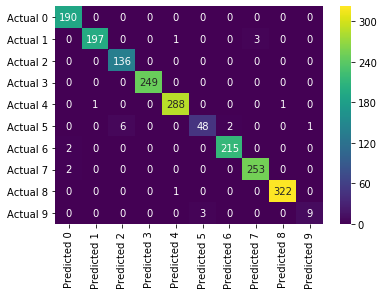

In [5]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

y_pred = random_forest.predict(X_val)
plot_confusion_matrix(y_val, y_pred);

In [7]:
test_case = pd.read_csv('test_case.csv')

X_test = clean_dataframe(test_case)

pred_test = random_forest.predict(X_test)

pred_test

array([4, 4, 1, 1, 7, 4, 1, 1, 1, 3, 8, 4, 3], dtype=int32)